x shape (1000, 5)
y shape (1000,)
defined model: {'base_estimator': LinearRegression(), 'auto_order': 5, 'exog_order': [5, 5, 5, 5, 5], 'exog_delay': [0, 0, 0, 0, 0], 'num_exog_inputs': 5, 'pred_step': 1}
X future shape (800, 5)
y forecast shape (800,)
{'base_estimator': LinearRegression(), 'auto_order': 5, 'exog_order': [5, 5, 5, 5, 5], 'exog_delay': [0, 0, 0, 0, 0], 'num_exog_inputs': 5, 'pred_step': 1}


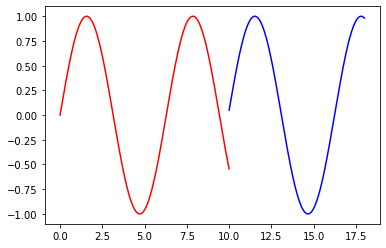

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from fireTS.models import NARX
import matplotlib.pyplot as plt


def model_narx(hyperparams):
    exog_order = hyperparams['features_num'] * [5]
    auto_order = 5
    mdl = NARX(LinearRegression(), auto_order = 5, exog_order = exog_order)
    return mdl

hyperparams={'features_num':5}
mdl = model_narx(hyperparams)
x1 = np.linspace(0,10,1000)
x = np.ones((1000,5))
x[:,-1] = x1
#y = np.sin(x1).reshape(-1,1)
y = np.sin(x1)
print('x shape',x.shape)
print('y shape',y.shape)

print("defined model:",mdl.__dict__)
mdl.fit(x, y)
steps = 800
#X_future = np.linspace(10,11,steps-1).reshape(-1,1)

X_future = np.ones((steps, 5))
x2 = np.linspace(10, 18, steps)
X_future[:,-1] = x2

y_forecast = mdl.forecast(x[0:5,:],y[0:5],step=steps, X_future=X_future[:-1,:])

plt.plot(x1,y,'r')
plt.plot(X_future[:,-1], y_forecast,'b')

print('X future shape',X_future.shape)
print('y forecast shape',y_forecast.shape)
print(mdl.__dict__)

In [133]:
y.shape

(1000,)